In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns
plt.rc('font', family='Microsoft JhengHei')

準確度: 0.85
精確度: 0.60
召回率: 0.75
F1分數: 0.67


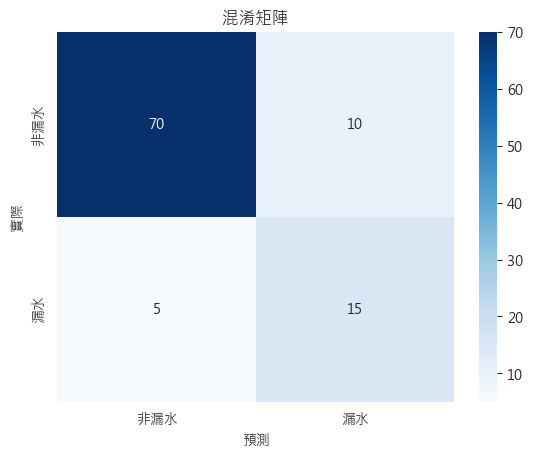

In [2]:

# 定義常數
TP = 15
FP = 10
TN = 70
FN = 5

# 真實情況和模型預測（0代表非漏水，1代表漏水）
y_true = np.array([0]*TN + [1]*TP + [0]*FP + [1]*FN)
y_pred = np.array([0]*(TN+FN) + [1]*(TP+FP))

# 計算混淆矩陣
conf_mat = confusion_matrix(y_true, y_pred)

# 計算評估指標
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# 打印評估指標
print('準確度: {:.2f}'.format(accuracy))
print('精確度: {:.2f}'.format(precision))
print('召回率: {:.2f}'.format(recall))
print('F1分數: {:.2f}'.format(f1_score))

# 繪製混淆矩陣
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['非漏水', '漏水'], yticklabels=['非漏水', '漏水'])
plt.ylabel('實際')
plt.xlabel('預測')
plt.title('混淆矩陣')
# save fig
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

A

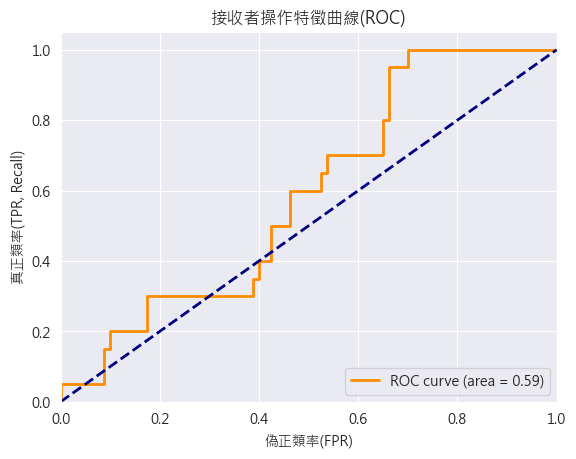

In [3]:
# 真實情況和模型預測的分數（這裡使用隨機數據作為例子）
# 在實際情況下，你應該使用你的分類器給出的概率分數
y_true = np.array([0]*TN + [1]*TP + [0]*FP + [1]*FN)
# 真正類和偽正類的分數接近1
np.random.seed(28)
positive_scores = np.concatenate([
    np.random.uniform(0.9, 1, TP),  # 真正類
    np.random.uniform(0.7, 1, FP)   # 偽正類
])

# 真負類和偽負類的分數接近0
negative_scores = np.concatenate([
    np.random.uniform(0, 0.3, TN),  # 真負類
    np.random.uniform(0, 0.2, FN)   # 偽負類
])


# 計算ROC曲線
y_scores = np.concatenate([positive_scores, negative_scores])
np.random.shuffle(y_scores)
fpr, tpr, thresholds = roc_curve(y_true, y_scores)

# 計算AUC
roc_auc = auc(fpr, tpr)

# 繪製ROC曲線
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('偽正類率(FPR)')
plt.ylabel('真正類率(TPR, Recall)')
plt.title('接收者操作特徵曲線(ROC)')
plt.legend(loc="lower right")
# save fig
plt.savefig('roc_curve.png', dpi=300, bbox_inches='tight')
plt.show()

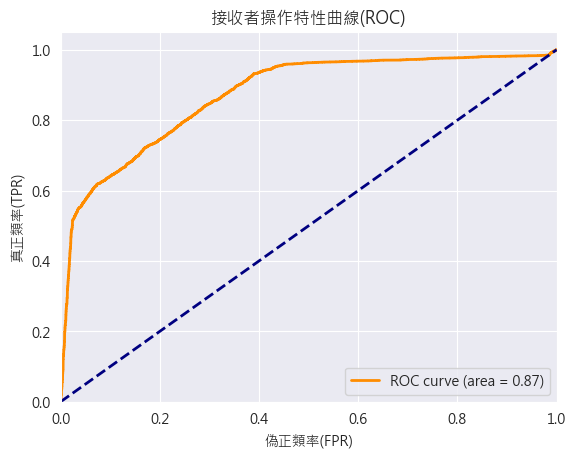

In [4]:
# 現有的y_true和y_scores
y_true = [0] * 500 + [1] * 500
np.random.seed(29)
y_scores = np.random.rand(len(y_true))

# 現有的y_true和y_scores
y_true = [0] * 500 + [1] * 500
np.random.seed(22)
y_scores = np.random.rand(len(y_true)).tolist()  # 將y_scores轉換為列表

# 添加10000個新的正確分類的樣本
y_true.extend([0] * 5000 + [1] * 5000)
 # 假設5000個0標籤的分數都較低
y_scores.extend(0.15 + np.random.rand(3000) * 0.3)
y_scores.extend(0.43 + np.random.rand(4000) * 0.3)  
y_scores.extend(0.7 + np.random.rand(3000) * 0.3)

# 計算FPR, TPR, 和閾值
fpr, tpr, thresholds = roc_curve(y_true, y_scores)

# 計算新的AUC
roc_auc = auc(fpr, tpr)

# 繪製ROC曲線
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('偽正類率(FPR)')
plt.ylabel('真正類率(TPR)')
plt.title('接收者操作特性曲線(ROC)')
plt.legend(loc="lower right")
# save fig
plt.savefig('roc_curve.png', dpi=300, bbox_inches='tight')
plt.show()


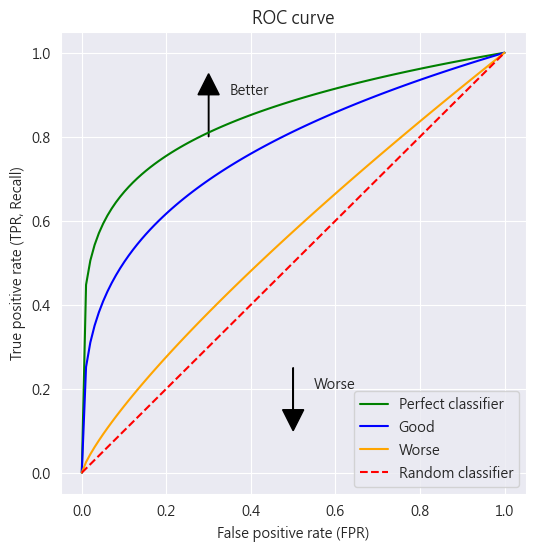

In [51]:
# 設定資料
fpr = np.linspace(0, 1, 100)

# Perfect classifier: 曲線形狀
perfect_tpr = (np.sqrt(fpr ** 0.35))

# Good classifier: 優於random但劣於perfect的線
good_tpr = (np.sqrt(fpr ** 0.6))

# Worse classifier: 僅稍好於隨機分類器
worse_tpr = fpr ** 0.8

# 繪圖
plt.figure(figsize=(6,6))
plt.plot(fpr, perfect_tpr, label='Perfect classifier', color='green')
plt.plot(fpr, good_tpr, label='Good', color='blue')
plt.plot(fpr, worse_tpr, label='Worse', color='orange')
plt.plot(fpr, fpr, '--', label='Random classifier', color='red')

# 加上箭頭和文字
plt.annotate('Better', xy=(0.6, 0.8), xytext=(0.35, 0.9))
plt.annotate('Worse', xy=(0.6, 0.3), xytext=(0.55, 0.2))
plt.arrow(0.3, 0.8, 0, 0.1, head_width=0.05, head_length=0.05, color='black')
plt.arrow(0.5, 0.25, 0, -0.1, head_width=0.05, head_length=0.05, color='black')

# 設定標籤、標題和圖例
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR, Recall)')
plt.title('ROC curve')
plt.legend(loc='lower right')

# 顯示圖形
plt.grid(True)
plt.savefig('roc_curve_sample.png', dpi=300, bbox_inches='tight')
plt.show()
